### Sklearn Hierarchical Clustering Implementation

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris(as_frame=True)
X = iris.data

In [2]:
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [3]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


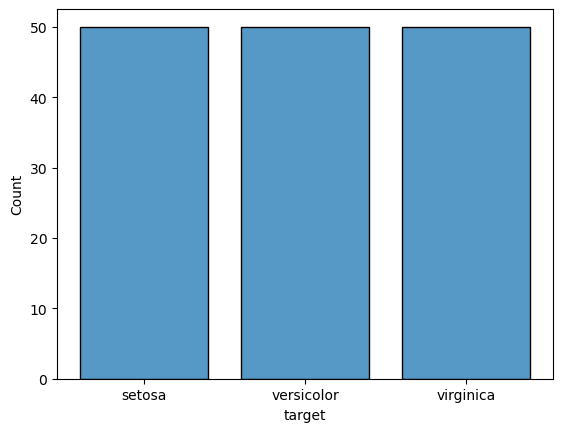

In [4]:
import seaborn as sns

b = sns.histplot(data=iris.target, discrete=True, shrink=.8)
b = b.set_xticks(range(len(iris.target_names)), labels=iris.target_names)

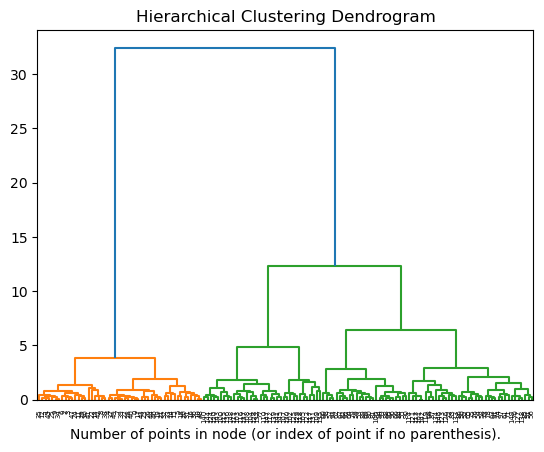

In [5]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [6]:
print(f'Cluster labels: {model.fit_predict(X)}')

Cluster labels: [147 131 115 136 143  85  92 148 137 146 144  97 123  84 105 107 132 114
 101 142  98  89 119 120 135 117 118  67  77 141  76 138  82  78 108 129
  75 111 112 140 128  91  94 106 121  99 116  48  81 126 104 103  71  59
 109  90 139  69  44  93  95 145  86 130 127  64 122  96  52 110  47  73
  70  79  58  57 149 124  55 133  34 113 134  42  83 125  88  63  60  45
  40  41  51 102  61  66 100  53  65  62  80  74  28  49  39  50  20  24
  38  68  56  29  30  46  23  36  33  16  54  19  27  37  22  31  87   9
  43  32  72  35  14  21  26  17  25  18  13  11  15  10  12   5   8   4
   6   7   3   2   1   0]


In [7]:
model = AgglomerativeClustering(n_clusters=3, # chose 3 since we know the iris dataset has three different species
                             metric='euclidean', 
                             linkage='complete', 
                             compute_distances=True)
labels = model.fit_predict(X)
print(f'Cluster labels: {labels}')
labels.shape

Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


(150,)

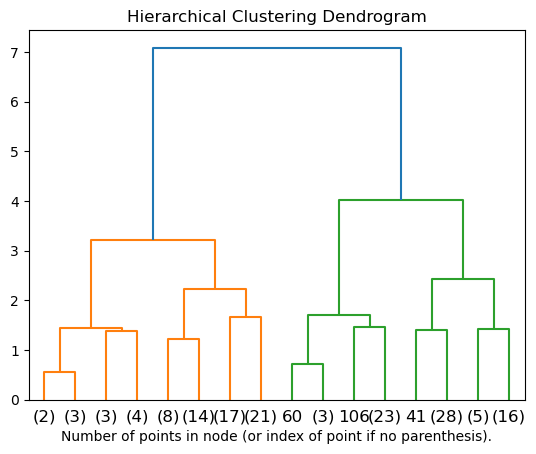

In [8]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### Scipy Hierarchical Clustering Implementation

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
linkage_matrix = linkage(X, method='ward')

On the plot orange is class 1, green class 2 and red and pruple class. Which is based on the red line

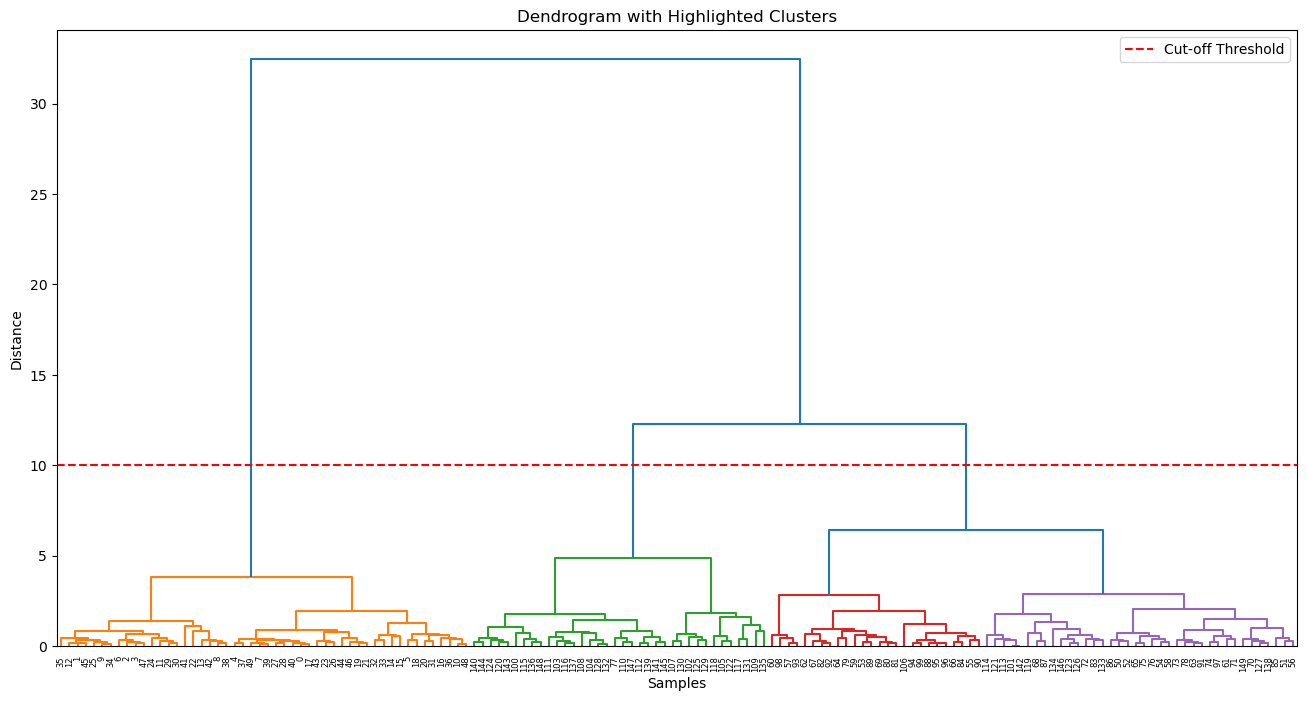

Cluster assignments: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 2
 2 3]


In [10]:
plt.figure(figsize=(16, 8))
dendrogram(linkage_matrix, color_threshold=5)  # Adjust threshold for 3 clusters
plt.axhline(y=10, color='r', linestyle='--', label="Cut-off Threshold")  # Mark threshold
plt.title("Dendrogram with Highlighted Clusters")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.xticks(fontsize=6, rotation=90)
plt.legend()
plt.show()

# Step 4: Assign cluster labels from dendrogram
clusters = fcluster(linkage_matrix, t=3, criterion='maxclust')
print(f"Cluster assignments: {clusters}")

In [11]:
iris.data['cluster']=clusters
features=iris.data.groupby('cluster').mean()
features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
1,5.006000,3.428000,1.462000,0.246000
2,6.869444,3.086111,5.769444,2.105556
3,5.920312,2.751562,4.420312,1.434375


In [12]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [14]:
iris.data['cluster'] = iris.data['cluster'] - 1
iris.data['cluster'] = iris.data['cluster'].replace({1: 2, 2: 1})

In [15]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
iris.data['cluster'].to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [17]:
iris.target.to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

Text(0.5, 1.0, 'Confusion Matrix')

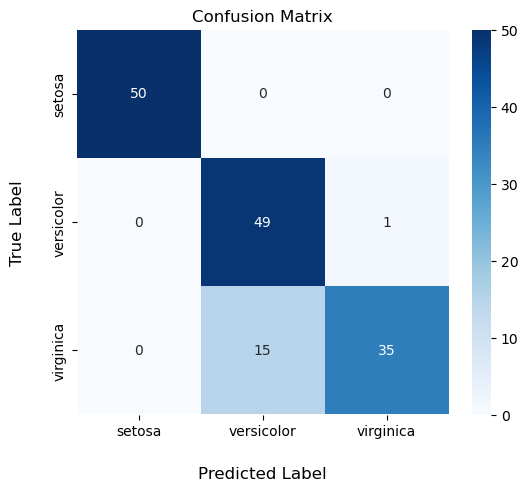

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

cm = confusion_matrix(iris.target.to_numpy(), iris.data['cluster'].to_numpy(),
                      labels=[0,1,2])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True,
                  yticklabels=list(iris.target_names), 
                      xticklabels=list(iris.target_names),
                      cmap="Blues")

plt.xlabel("Predicted Label", fontsize=12, labelpad=20)  # Increase padding for clarity
plt.ylabel("True Label", fontsize=12, labelpad=20)
plt.title("Confusion Matrix")



In [20]:
iris.data['cluster'].to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [21]:
from sklearn.metrics import classification_report
print(classification_report(iris.target.to_numpy(), 
                            iris.data['cluster'].to_numpy(),
                            target_names=list(iris.target_names)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.77      0.98      0.86        50
   virginica       0.97      0.70      0.81        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



In [22]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(iris.target.to_numpy(), 
                            iris.data['cluster'].to_numpy(), average="micro")

print("--- Macro Metrics ---")
print(f'''Precision:\t {precision}\nRecall:\t\t {recall} \nF1-Score:\t {f1}''')

precision, recall, f1, support = precision_recall_fscore_support(iris.target.to_numpy(), 
                            iris.data['cluster'].to_numpy(), average="micro")

print("--- Micro Metrics ---")
print(f'''Precision:\t {precision}\nRecall:\t\t {recall} \nF1-Score:\t {f1}''')

--- Macro Metrics ---
Precision:	 0.8933333333333333
Recall:		 0.8933333333333333 
F1-Score:	 0.8933333333333333
--- Micro Metrics ---
Precision:	 0.8933333333333333
Recall:		 0.8933333333333333 
F1-Score:	 0.8933333333333333
